# **DE COMPRAS**

Los minoristas suelen ofrecer grandes descuentos para iniciar la temporada navideña, por ejemplo. Es común que los minoristas ofrezcan promociones especiales y abran sus puertas durante las horas previas al amanecer para atraer clientes. 

Para mantenerse al día con la competencia, los minoristas necesitan algunos conocimientos y un grupo de clientes para segmantizarlos y dirigirse a ellos. Por tanto, los minoristas pueden utilizar diferentes estrategias de marketing para atraer diferentes tipos de clientes.  

Un analista de datos puede ayudar a los minoristas con información adecuada basada en los datos históricos de las compras y también brindar soluciones adecuadas basadas en datos mediante el uso de métodos de Machine Learning. Por lo tanto, pueden lograr su objetivo/meta. Este proyecto trata sobre esto. 

### **1. Entendimiento del negocio** 

Como se mencionó anteriormente, el objetivo de todos los minoristas es atraer cada vez a más clientes para sus ofertas. Esto es como una competencia para atraer clientes a sus plataformas en línea o tiendas minoristas físicas. Entonces, comencemos a explorar el conjunto de datos. 

  

Primero importaremos bibliotecas y cargaremos los datos. 

In [95]:
import numpy as np # algebra lineal 
import pandas as pd # marco de datos 

# para plotear 
import seaborn as sns
import matplotlib.pyplot as plt

# para preprocesar
import sklearn
import sklearn.preprocessing as sk_preprocess
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# algoritmos Machine Learning
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# herramientas 
import os
import warnings
import pickle
from math import sqrt
import math

# ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# standard scaler object
stdscaler = StandardScaler()

In [78]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.8 MB/s eta 0:00:00m eta 0:00:010:01


In [5]:
df_sales = pd.read_csv("sales_group_1.csv")

### **2. Comprensión de los datos**

#### **DICIONARIO** 

- User_ID: Identificador único del comprador. 
- Product_ID: Identificador único del producto. (No se proporciona ninguna clave) 
- Gender: Sexo del comprador. 
- Age: Edad del comprador dividida en contenedores. 
- Occupation: Ocupación de comprador. (No se proporciona ninguna clave) 
- City_Category: Ubicación de residencia del comprador. (No se proporciona ninguna clave) 
- Stay_In_Current_City_Years: Número de años de estancia en la ciudad actual. 
- Marital_Status: Estado civil del comprador. 
- Product_Category_1: Categoría de producto de compra. 
- Product_Category_2: El producto puede pertenecer a otra categoría. 
- Product_Category_3: El producto puede pertenecer a otra categoría. 
- Compra: Monto de la compra en dólares. 

Ahora que tenemos el marco de datos, podemos comenzar a hacer EDA (Análisis de datos exploratorios), DA (Análisis descriptivo).
Echemos un vistazo a las primeras 5 filas.

In [6]:
df_sales.shape
# El marco de datos tiene 550068 filas y 12 columnas.

(550068, 12)

In [4]:
df_sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df_sales.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
91602,1002063,P00346442,M,26-35,4,A,3,0,1,2.0,14.0,8099
70640,1004826,P00282242,M,46-50,12,C,1,1,5,8.0,17.0,8875
492766,1003868,P00048042,M,18-25,12,C,0,0,1,6.0,8.0,11796
81347,1000549,P00177342,M,26-35,6,A,3,0,8,NaN,NaN,9994
10426,1001605,P00030842,F,18-25,0,B,1,0,1,2.0,15.0,12044
8528,1001306,P00196042,M,26-35,3,B,3,0,4,9.0,15.0,2181
172661,1002727,P00112142,M,26-35,11,C,0,0,1,2.0,14.0,15275
260079,1004042,P00295242,M,36-45,15,B,3,1,8,NaN,NaN,5882
358164,1001181,P00112642,M,36-45,7,A,3,1,1,2.0,5.0,15221
466348,1005826,P00058042,M,18-25,4,A,2,1,8,16.0,NaN,9750


Análisis descriptivo de todos los campos que incluye el recuento de valores no nulos, tipos de datos, media, mediana, mínimo, máximo, etc.

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df_sales.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


Forma de datos y valores únicos de usuarios y productos.

In [8]:
print("Columnas -> {}".format(list(df_sales.columns)))
print()
print("==============================================")
print("Total Transacciones -> {}".format(df_sales.shape[0]))

unique_users = len(df_sales.User_ID.unique())
print("Total Usuarios unicos -> {}".format(unique_users))

unique_products = len(df_sales.Product_ID.unique())
print("Total Productos unicos -> {}".format(unique_products))

Columnas -> ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

Total Transacciones -> 550068
Total Usuarios unicos -> 5891
Total Productos unicos -> 3631


Total de transacciones por edad, género, ocupación, ciudad y años de estancia en la ciudad actual 

### **Preguntas**

- ¿Qué grupo de edad ha realizado más transacciones? 
- ¿Los hombres han realizado más transacciones que las mujeres? 
- ¿La ocupación de los usuarios tiene alguna relación con el número de transacciones? 
- ¿Los usuarios que llevan más de 1 año viviendo en la ciudad han realizado más transacciones? 
- ¿La categoría de ciudad tiene algún impacto en la cantidad de compra? 
- ¿El estado civil está relacionado con estas compras? 

### **Creación de gráficos de recuento para campos categóricos importantes**

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

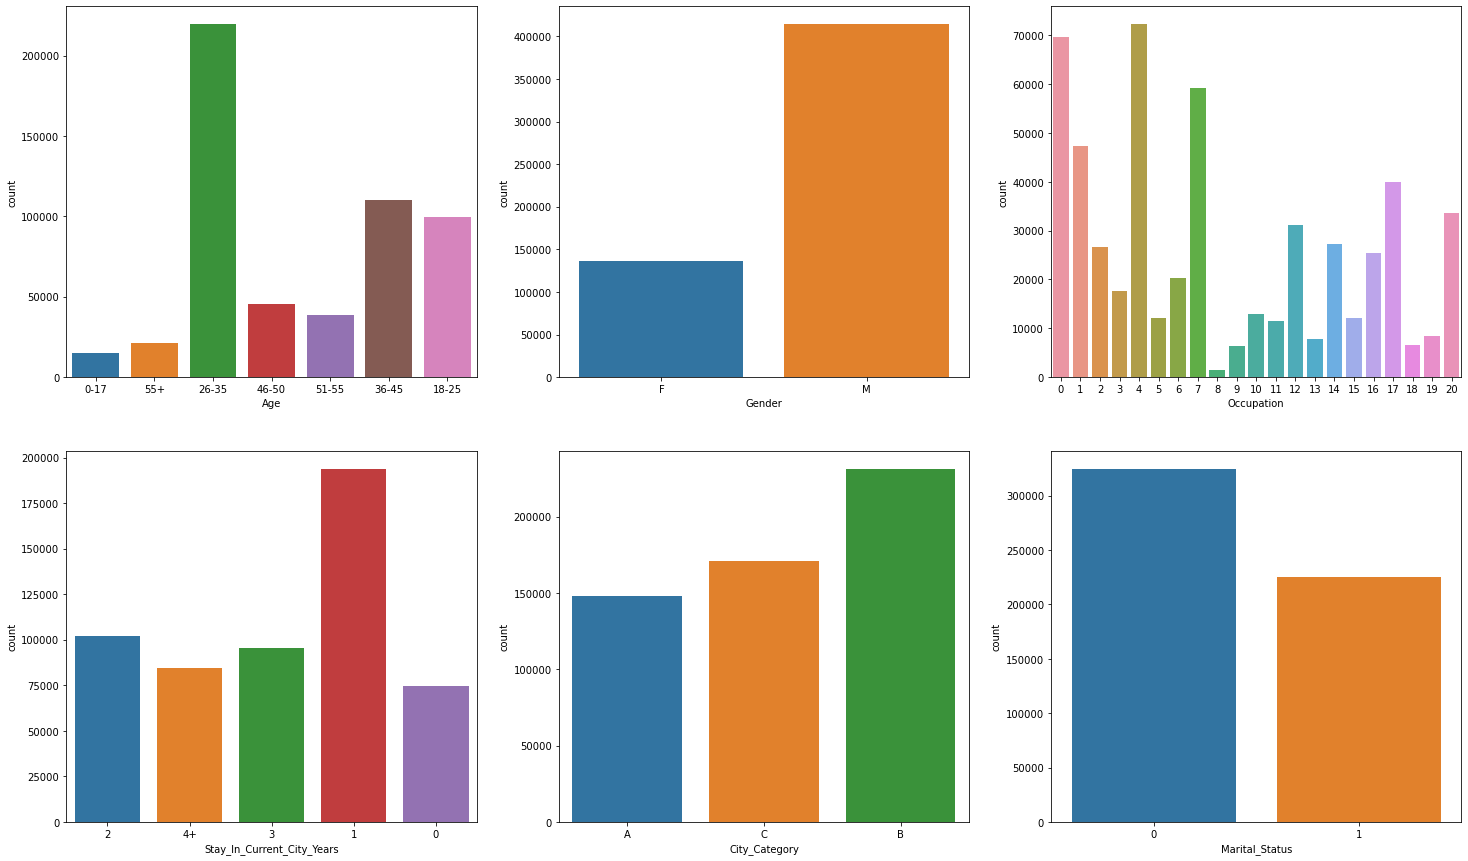

In [9]:
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(25,15))

sns.countplot(df_sales["Age"],ax=axis[0,0])
sns.countplot(df_sales["Gender"],ax=axis[0,1])
sns.countplot(df_sales["Occupation"],ax=axis[0,2])
sns.countplot(df_sales["City_Category"],ax=axis[1,1])
sns.countplot(df_sales["Stay_In_Current_City_Years"],ax=axis[1,0])
sns.countplot(df_sales["Marital_Status"],ax=axis[1,2])

### De las cifras anteriores podemos concluir que, 

- En el gráfico 1, el rango de edad de 26 a 35 años ha realizado más transacciones. 
- En la figura 2, los usuarios masculinos han realizado más transacciones. 
- En la figura 3, los Usuarios cuyas ocupaciones son 0 y 4 han realizado más transacciones. 
- En la figura 4, los usuarios que permanecieron en la ciudad actual durante 1 año realizaron más transacciones. 
- En la figura 5, los usuarios de la categoría de ciudad B han realizado más transacciones. 
- En la figura 6, los usuarios que aún no están casados han realizado más transacciones. 

==================================================== 

Monto total de compra pagado grupo por edad, sexo, ocupación, ciudad, años de estadía en la ciudad actual y estado civil 

### **Preguntas:**

- ¿Qué grupo de edad ha gastado más en el black friday? 
- ¿Las mujeres han gastado más que los hombres? 
- ¿La ocupación de los usuarios tiene alguna relación con el gasto de dinero en el Black Friday? 
- ¿Los usuarios que llevan más de 1 año viviendo en la ciudad han gastado más dinero? 
- ¿La categoría de ciudad tiene algún impacto en el monto total de la compra? 
- ¿El estado civil está relacionado con el viernes negro? 

Creación de gráficos de recuento para campos categóricos importantes

<AxesSubplot:xlabel='Marital_Status'>

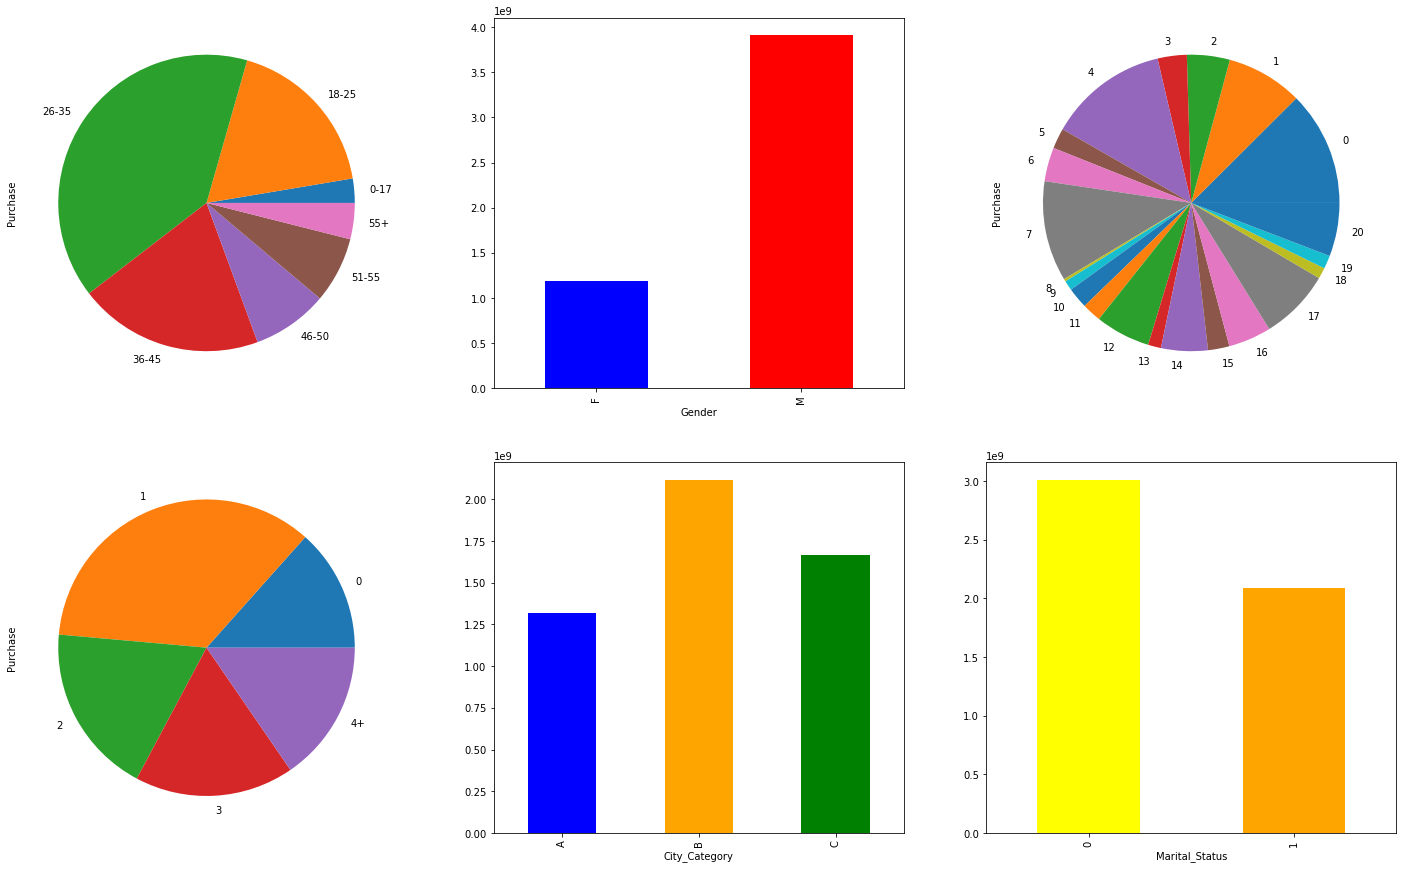

In [10]:
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(25,15))

cities_colors = {'A': 'blue', 'B': 'green', 'C': 'orange'}
gender = {'F': 'blue', 'M': 'red'}
status = {0: 'yellow', 1: 'orange'}

df_sales.groupby(["Age"])["Purchase"].sum().plot(kind='pie',ax=axis[0,0])
df_sales.groupby(["Gender"])["Purchase"].sum().plot(kind='bar',ax=axis[0,1], color=[gender[g] for g in df_sales['Gender'].unique()])
df_sales.groupby(["Occupation"])["Purchase"].sum().plot(kind='pie',ax=axis[0,2])
df_sales.groupby(["City_Category"])["Purchase"].sum().plot(kind='bar',ax=axis[1,1], color=[cities_colors[city] for city in df_sales['City_Category'].unique()])
df_sales.groupby(["Stay_In_Current_City_Years"])["Purchase"].sum().plot(kind='pie',ax=axis[1,0])
df_sales.groupby(["Marital_Status"])["Purchase"].sum().plot(kind='bar',ax=axis[1,2], color=[status[s] for s in df_sales['Marital_Status'].unique()])

### De las cifras anteriores podemos concluir que, 

- En la figura 1, el rango de edad de 26 a 35 años ha gastado más dinero. 
- En la figura 2, los usuarios masculinos han gastado más dinero. 
- En la figura 3, los Usuarios cuyas ocupaciones son 0 y 4 han gastado más dinero. 
- En la figura 4, los usuarios que permanecieron en la ciudad actual durante 1 año gastaron más dinero. 
- En la figura 5, los usuarios de la categoría de ciudad B han gastado más dinero. 
- En la figura 6, los usuarios que aún no están casados han gastado más dinero. 

Por cierto, las estadísticas son iguales tanto para el recuento total como para el importe de la compra. Entonces, revisemos la cantidad promedio. 

==================================================== ==================== 

Veamos Monto Promedio Comprado por Edad, Género, Ocupación, Ciudad, Años de Estancia en la Ciudad actual y estado civil 

### **Preguntas:**

- ¿Los valores promedio tienen una historia diferente que contar que los valores totales? 

<AxesSubplot:xlabel='Marital_Status'>

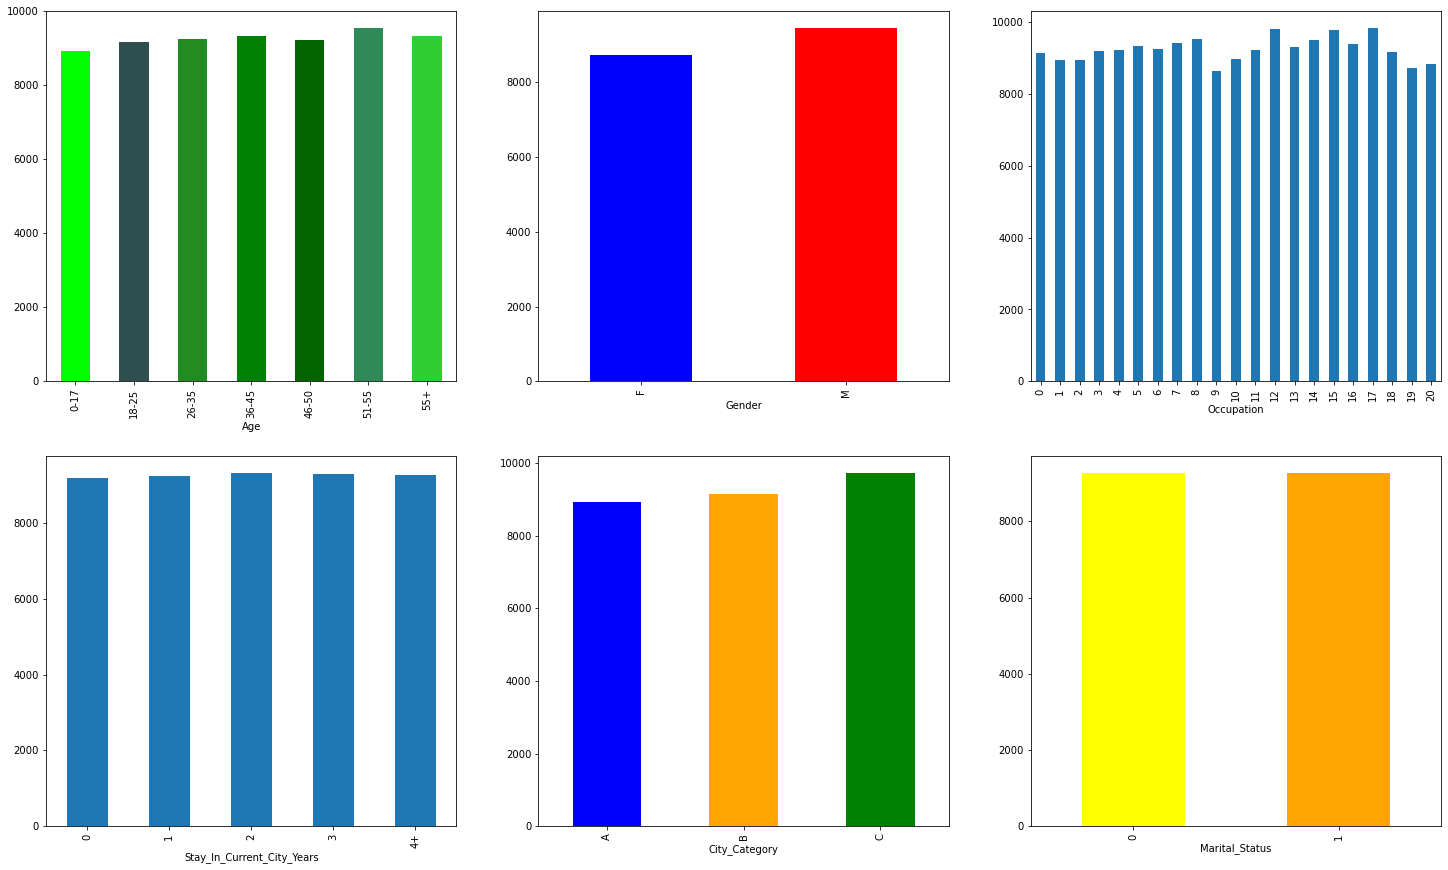

In [11]:
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(25,15))

age = {'0-17': 'lime', '18-25': 'limegreen', '26-35': 'forestgreen', '36-45': 'seagreen', '46-50': 'green', '51-55': 'darkgreen', '55+': 'darkslategray'}
gender = {'F': 'blue', 'M': 'red'}
cities_colors = {'A': 'blue', 'B': 'green', 'C': 'orange'}
status = {0: 'yellow', 1: 'orange'}

df_sales.groupby(["Age"])["Purchase"].mean().plot(kind='bar',ax=axis[0,0], color=[age[a] for a in df_sales['Age'].unique()])
df_sales.groupby(["Gender"])["Purchase"].mean().plot(kind='bar',ax=axis[0,1], color=[gender[g] for g in df_sales['Gender'].unique()])
df_sales.groupby(["Occupation"])["Purchase"].mean().plot(kind='bar',ax=axis[0,2])
df_sales.groupby(["City_Category"])["Purchase"].mean().plot(kind='bar',ax=axis[1,1], color=[cities_colors[city] for city in df_sales['City_Category'].unique()])
df_sales.groupby(["Stay_In_Current_City_Years"])["Purchase"].mean().plot(kind='bar',ax=axis[1,0])
df_sales.groupby(["Marital_Status"])["Purchase"].mean().plot(kind='bar',ax=axis[1,2], color=[status[s] for s in df_sales['Marital_Status'].unique()])

Después de ver las cifras anteriores, podemos concluir que, según los datos, para todas las categorías de los campos categóricos, las cantidades promedio compradas son casi las mismas.

==================================================== ====================

Veamos el Monto total Comprado por género por Edad, Ocupación, Años de Estancia en la Ciudad actual y estado civil

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

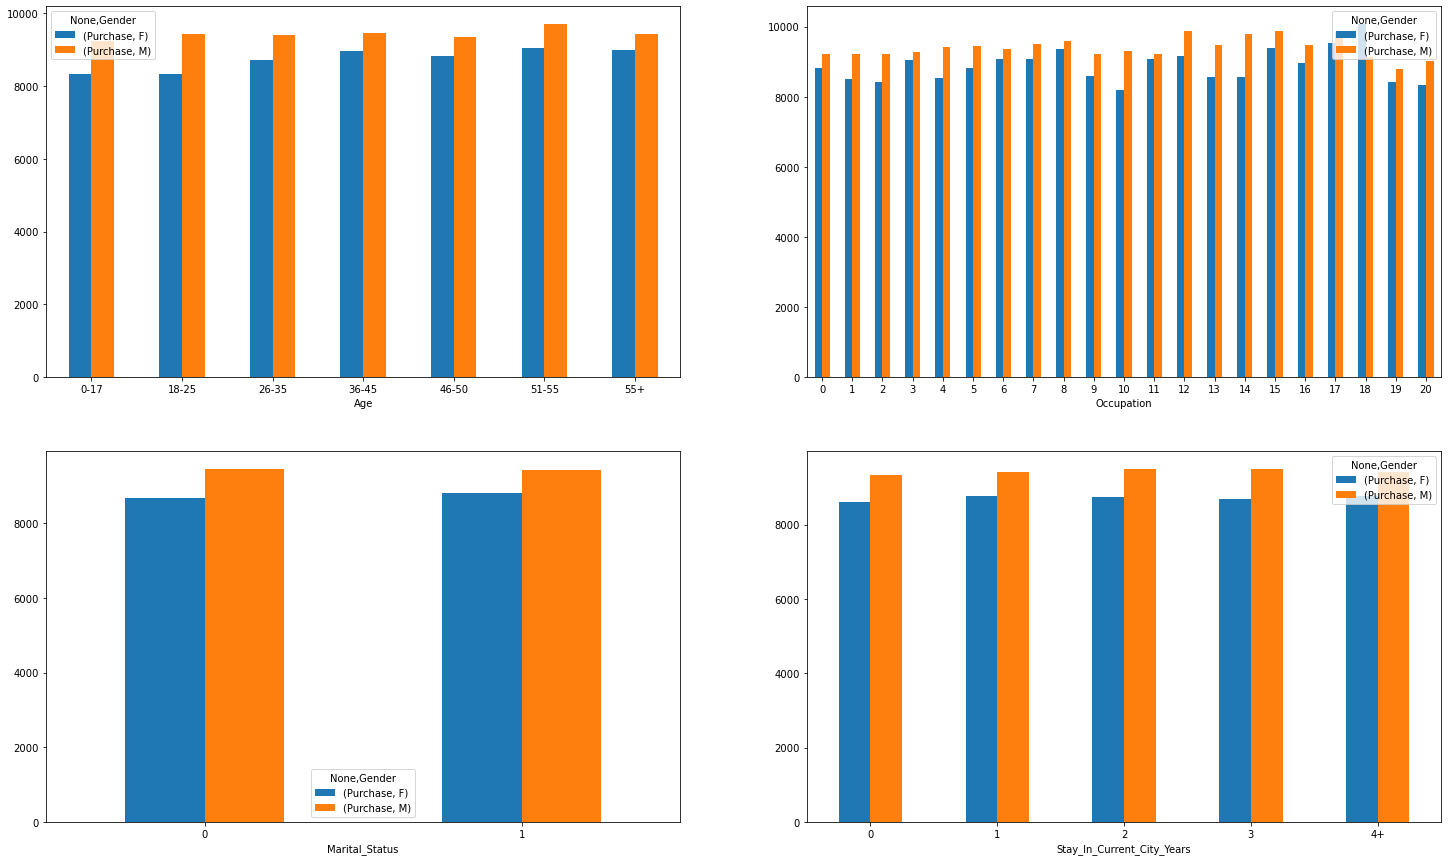

In [12]:
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(25,15))

df_sales.groupby(["Age","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[0,0])
df_sales.groupby(["Occupation","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[0,1])
df_sales.groupby(["Marital_Status","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[1,0])
df_sales.groupby(["Stay_In_Current_City_Years","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[1,1])

### **Detección de valores atípicos.**

Comprobación de la presencia de valores atípicos mediante BoxPlot.

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

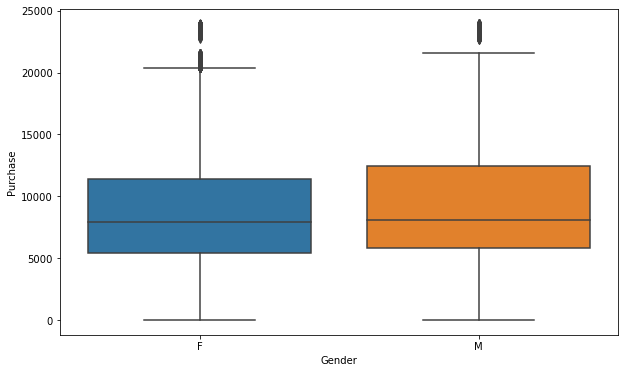

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sales, x="Gender", y="Purchase")
# Usando boxplot podemos detectar la presencia de valores atípicos en los datos.

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

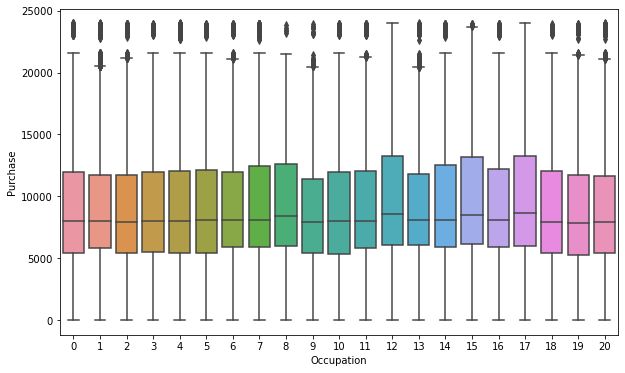

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sales, x="Occupation", y="Purchase")
# La columna de compra tiene valores atípicos que pueden afectar el rendimiento de los modelos de aprendizaje automático.

Como podemos ver arriba, hay valores atípicos presentes en la columna Compra.

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

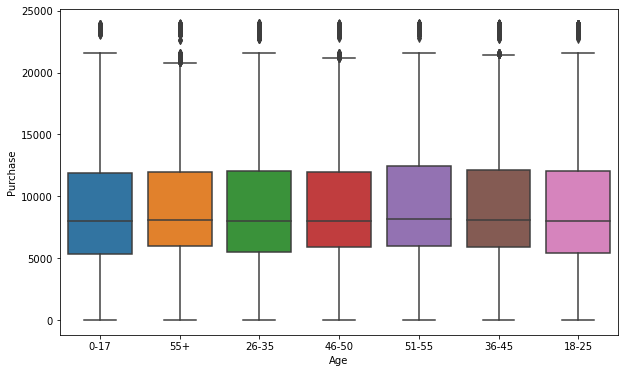

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sales, x="Age", y="Purchase")
# Podemos ver a continuación que la Edad con Compras nuevamente tiene algunos valores atípicos presentes.

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

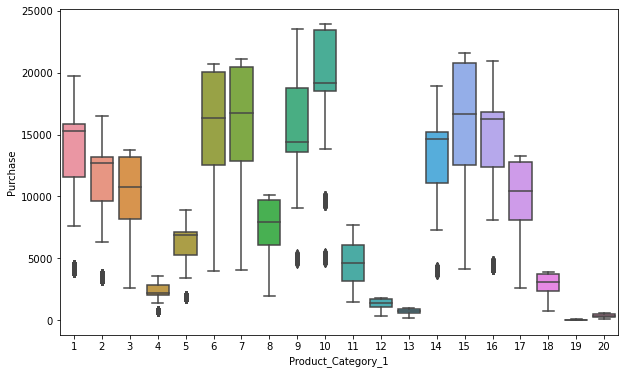

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sales, x="Product_Category_1", y="Purchase")
# También hay valores atípicos presentes en la categoría Producto.

==================================================== 

Veamos el diagrama de pares con todas las columnas numéricas.

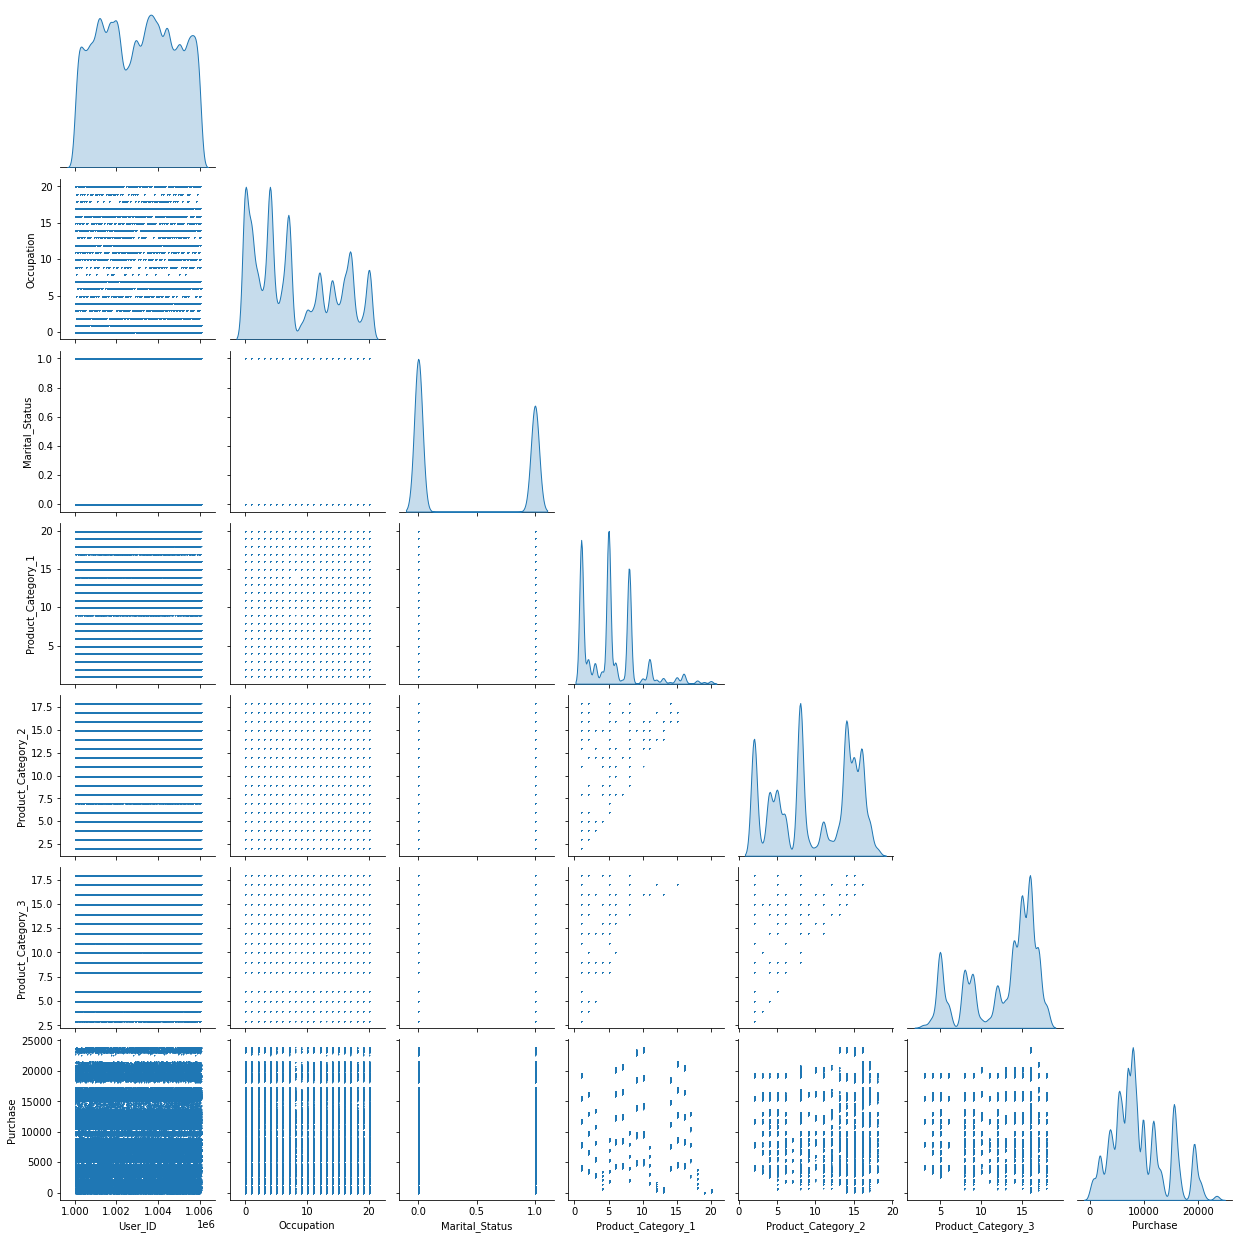

In [13]:
sns.pairplot(df_sales,diag_kind="kde",corner=True,
             markers="+",
             plot_kws=dict(s=1, edgecolor="b", linewidth=1),
             diag_kws=dict(shade=True) )

- El diagrama de pares anterior no brinda más información sobre la correlación entre valores numéricos.
- También se están considerando los campos de estado civil y ocupación, ya que están en forma numérica. Necesitamos cambiar esos campos a tipo categórico.

### **3. Preparar datos**
Manejar valores faltantes

In [17]:
(df_sales.isna().sum()*100/df_sales.shape[0]).sort_values(ascending=False).to_frame().rename(columns={0:"Porcentaje de valores faltantes"})

,Porcentaje de valores faltantes
Product_Category_3,69.672659
Product_Category_2,31.566643
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000


### Categorías de Producto

Las categorías de productos son categorías de ese producto en particular; si el producto pertenece a más de una categoría, habrá algunos valores disponibles para otras categorías de productos. Así que aquí estamos tratando con una característica categórica muy extraña.

déjame mostrarte un ejemplo de product_ID = "P00265242" en particular,

In [15]:
df_sales.loc[df_sales.Product_ID=="P00265242",["User_ID","Product_ID","Product_Category_1" ,"Product_Category_2","Product_Category_3"]]

,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
399,1000066,P00265242,5,8.0,NaN
1191,1000196,P00265242,5,8.0,NaN
1372,1000222,P00265242,5,8.0,NaN
1845,1000301,P00265242,5,8.0,NaN
2209,1000345,P00265242,5,8.0,NaN
...,...,...,...,...,...
543413,1005667,P00265242,5,8.0,NaN
544366,1005797,P00265242,5,8.0,NaN
544629,1005837,P00265242,5,8.0,NaN
544834,1005872,P00265242,5,8.0,NaN


Entonces, para una ID de producto particular, tendrá los mismos valores para todas las categorías de productos.

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

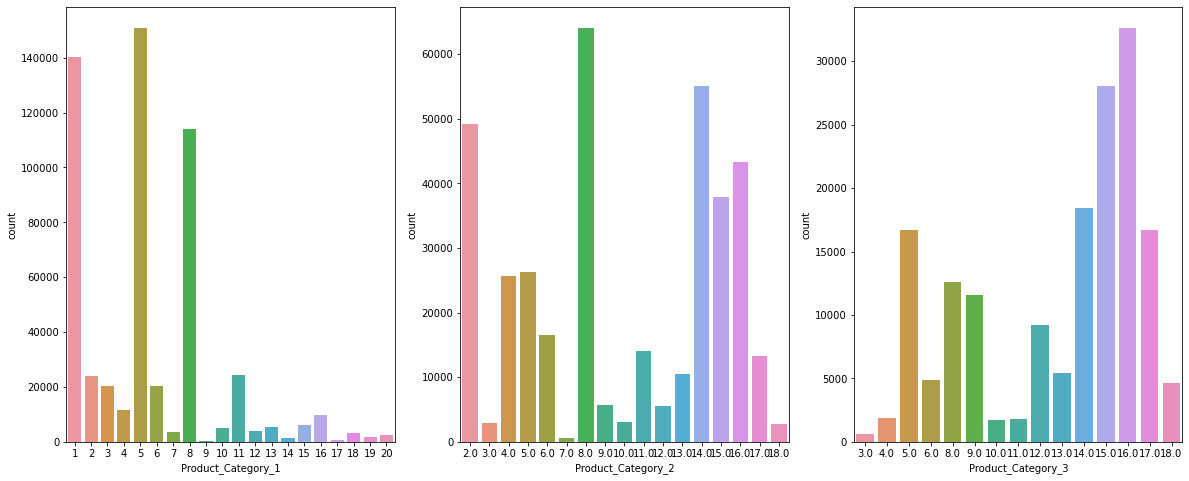

In [18]:
fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(20,8))

sns.countplot(df_sales["Product_Category_1"],ax=axis[0])
sns.countplot(df_sales["Product_Category_2"],ax=axis[1])
sns.countplot(df_sales["Product_Category_3"],ax=axis[2])

esto es lo que se entendío de los datos, por lo que para completar los valores faltantes solo necesitamos completarlos como cero.

In [19]:
df_sales[["Product_Category_2","Product_Category_3"]] = df_sales[["Product_Category_2","Product_Category_3"]].fillna(0)

### Comprobemos de nuevo

In [20]:
(df_sales.isna().sum()*100/df_sales.shape[0]).sort_values(ascending=False).to_frame().rename(columns={0:"Porcentaje de valores faltantes"})

,Porcentaje de valores faltantes
User_ID,0.0
Product_ID,0.0
Gender,0.0
Age,0.0
Occupation,0.0
City_Category,0.0
Stay_In_Current_City_Years,0.0
Marital_Status,0.0
Product_Category_1,0.0
Product_Category_2,0.0


### **Transformación de datos** 

Ahora no nos faltan valores, por lo que podemos transformar nuestros datos e introducirlos en el modelo de aprendizaje automático para el entrenamiento. 

### **Para la transformación:**  

- **Campos categóricos:** utilizaremos el codificador de etiquetas para etiquetar todas las categorías. 
- **Campos numéricos:** podemos estandarizar los valores según el escalador estándar y transformar los datos en media = 0, std = 1. Por cierto, parece que en realidad no es necesario, ya que todos los campos son solo campos algo categóricos. 
 

Obtenga dos marcos de datos que contengan solo campos independientes y solo campos dependientes en nuevas variables 

In [22]:
# codificador de categorias
le = LabelEncoder()

df_sales["Age"] = le.fit_transform(df_sales["Age"])
df_sales["Stay_In_Current_City_Years"] = le.fit_transform(df_sales["Stay_In_Current_City_Years"])
df_sales["City_Category"] = le.fit_transform(df_sales["City_Category"])

# eliminando variables innesesarias
train_dropped_df = df_sales.drop(['User_ID', 'Product_ID'],axis=1)
print("Se eliminó el campo de identificación de usuario y producto.")

train_dropped_df = pd.get_dummies(train_dropped_df)

X = train_dropped_df.drop(columns= ["Purchase"])
# marcos de datos separados, uno es para campos independientes y otro para la variable dependiente (variable objetivo)
y = train_dropped_df['Purchase'].values

Se eliminó el campo de identificación de usuario y producto.


### ¿Cuál es la correlación entre las variables?

<AxesSubplot:title={'center':'Pearson - correlacion de caracteristicas'}>

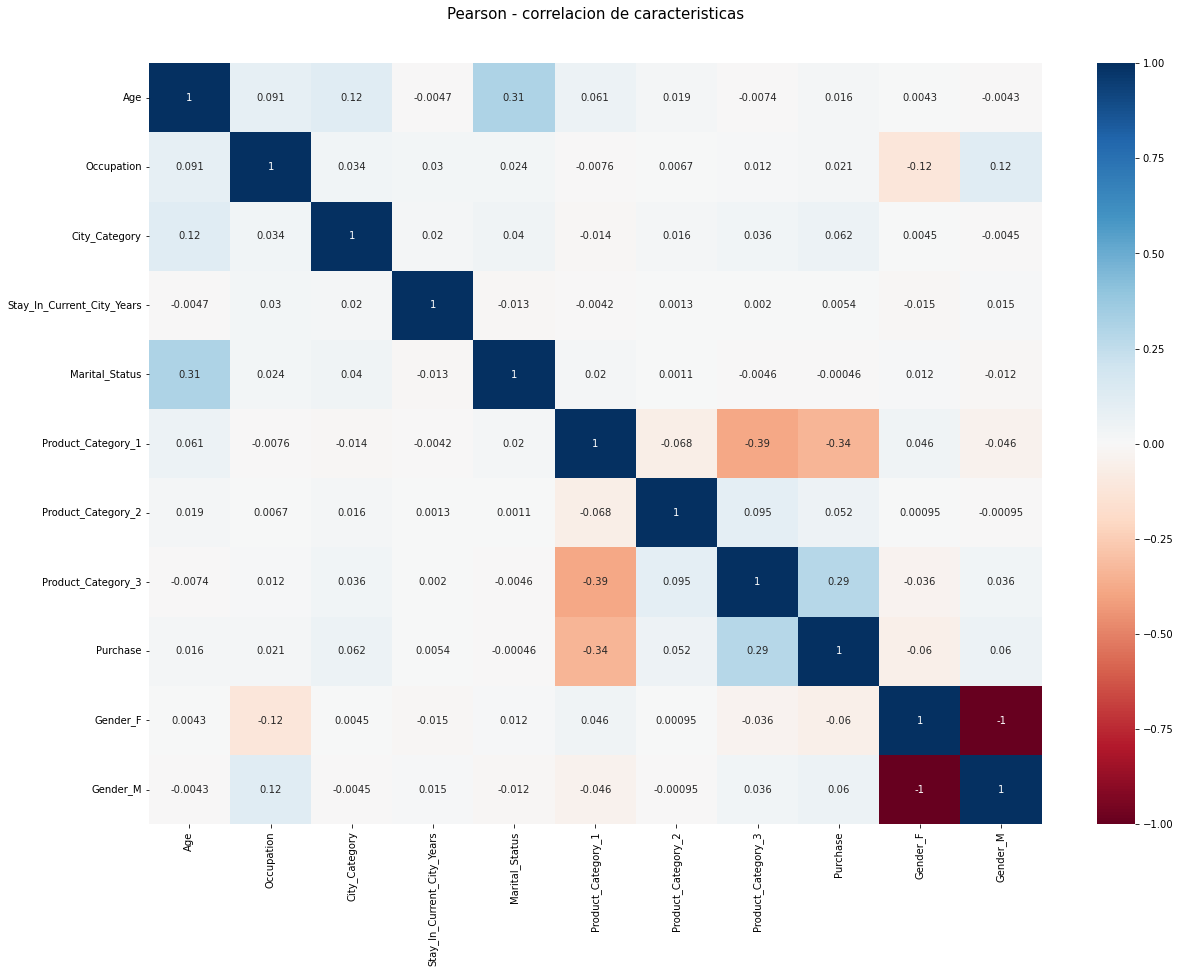

In [26]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,14))
plt.title('Pearson - correlacion de caracteristicas', y=1.05, size=15)
sns.heatmap(train_dropped_df.corr(),
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True)

In [28]:
print("Input dimension -> {}".format(X.shape))
print("Output dimension -> {}".format(y.shape))

Input dimension -> (550068, 10)
Output dimension -> (550068,)


4. Modelado de datos 
5. Evaluar los resultados: Divida los datos en conjuntos de datos de entrenamiento y prueba en un 70 % -30 %

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Input train dimension -> {}".format(X_train.shape))
print("Input test dimension -> {}".format(X_test.shape))

Input train dimension -> (385047, 10)
Input test dimension -> (165021, 10)


# **Modelo 1**

### Entrenando diferentes modelos y evaluando los resultados.

In [30]:
def train_and_evaluate(model,X_train,y_train,X_test,y_test):
    '''
    Esta función sirve para ajustarse al modelo de aprendizaje automático y evaluar la puntuación R2 para los datos de entrenamiento y prueba.
    
    ENTRADA:
    model - Machine Learning model
    X_train - Datos de entrenamiento
    y_train - Valores de salida del entrenamiento
    X_test - Datos de prueba
    y_test - valores de salida de prueba
    
    SALIDA:
    model - Modelo de aprendizaje automático entrenado
    '''
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # El método de puntuación proporciona la puntuación R2 en realidad, por lo que podemos verificar directamente la puntuación R2
    print("Entrenamiento R-2 Score -> {}".format(r2_score(y_train, y_pred_train)))
    print("Prueba R-2 Score -> {}".format(r2_score(y_test,y_pred_test)))
    print()
    print("=============================================")
    print()
    print("Entrenamiento RMSE  -> {}".format(sqrt(mean_squared_error(y_train, y_pred_train))))
    print("Prueba RMSE  -> {}".format(sqrt(mean_squared_error(y_test,y_pred_test))))
    return model

### **1. Regresión lineal**

In [31]:
lr = LinearRegression(n_jobs=-1)
train_and_evaluate(lr,X_train,y_train,X_test,y_test)

Entrenamiento R-2 Score -> 0.15303197386504241
Prueba R-2 Score -> 0.1502225848000539


Entrenamiento RMSE  -> 4623.897758674754
Prueba RMSE  -> 4627.777465694635


LinearRegression(n_jobs=-1)

Las métricas de evaluación anteriores nos ayudan a determinar qué tan bien se está desempeñando nuestro modelo. Como podemos ver, r2_score es solo 0,15 y como el error cuadrático medio es alto, el modelo no es muy preciso para predecir las compras o la columna objetivo.

### **2. Regresor de árbol de decisión**

In [32]:
dtr = DecisionTreeRegressor(max_depth=8,
                            min_samples_split=5,
                           max_leaf_nodes=10,
                            min_samples_leaf=2,
                            random_state=142)
train_and_evaluate(dtr,X_train,y_train,X_test,y_test)

Entrenamiento R-2 Score -> 0.620705208649921
Prueba R-2 Score -> 0.6151249212697111


Entrenamiento RMSE  -> 3094.305250315925
Prueba RMSE  -> 3114.4385769651567


DecisionTreeRegressor(max_depth=8, max_leaf_nodes=10, min_samples_leaf=2,
                      min_samples_split=5, random_state=142)

El regresor del árbol de decisión es mejor en comparación con la regresión lineal, ya que se puede observar que el error cuadrático medio es menor en comparación con el modelo anterior y el valor RSuared es menor en este modelo.

### **3. Regresor de bosque aleatorio**

In [33]:
rf = RandomForestRegressor(max_depth=8,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=142)
train_and_evaluate(rf,X_train,y_train,X_test,y_test)

Entrenamiento R-2 Score -> 0.6562463716226338
Prueba R-2 Score -> 0.6491769152142575


Entrenamiento RMSE  -> 2945.7667802369456
Prueba RMSE  -> 2973.4727049991225


RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                      random_state=142)

El modelo de regresor Random Forest es nuevamente mejor que el modelo anterior ya que tenemos un valor de error cuadrático medio más bajo y el valor de Rsquared es menor que el modelo anterior.

### **4. Regresor KNN**

In [34]:
knnreg = KNeighborsRegressor(n_neighbors = 6)
train_and_evaluate(knnreg,X_train,y_train,X_test,y_test)

Entrenamiento R-2 Score -> 0.6873118953438755
Prueba R-2 Score -> 0.5858752100425049


Entrenamiento RMSE  -> 2809.5087876751913
Prueba RMSE  -> 3230.6171115435855


KNeighborsRegressor(n_neighbors=6)

### **5. Regresor XGBoost**

In [35]:
# Varios hiperparámetros para ajustar
xgbr = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #el llamado valor `eta`
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgbr,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)

fitted_xgb = train_and_evaluate(xgb_grid,X_train,y_train,X_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Entrenamiento R-2 Score -> 0.6909899600948919
Prueba R-2 Score -> 0.6725129894829014


Entrenamiento RMSE  -> 2792.936166542493
Prueba RMSE  -> 2872.8762176076675


In [36]:
print(fitted_xgb.best_score_)
print(fitted_xgb.best_params_)

0.6756733795987431
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.7}


# **Modelo 2**

In [14]:
df_sales2 = pd.read_csv("sales_group_1.csv")

In [15]:
df_sales2['Product_ID'] = df_sales2['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
df_sales2['Product_ID'] = ss.fit_transform(df_sales2['Product_ID'].values.reshape(-1, 1))
## Reemplazando ''P00'' sin valor y escalando la columna ProductID.

In [17]:
df_sales2.drop(['Product_Category_3'],axis=1,inplace=True)
# Hay más del 50 por ciento de valores faltantes presentes en Product_category_column, por lo que eliminaremos esa columna.

In [19]:
df_sales2['Product_Category_2']=df_sales2['Product_Category_2'].fillna(df_sales2['Product_Category_2'].mean())
## Los datos que faltan en la columna de la categoría de producto 2 se han imputado utilizando la media.

In [21]:
df_sales2.isnull().sum()
## Como podemos ver, los valores faltantes se han imputado correctamente y ahora no hay valores nulos presentes en el conjunto de datos.

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [23]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df_sales2[i]=le.fit_transform(df_sales2[i])
df_sales2.dtypes
## La técnica de codificación de etiquetas ahora reemplazará todas las variables categóricas por numéricas para facilitar el cálculo.

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [25]:
df_sales2['Stay_In_Current_City_Years']=df_sales2['Stay_In_Current_City_Years'].replace('4+','4')
## Los valores en la columna Stay_In_Current_City_Years se han cambiado de 4+ a 4

In [28]:
df_sales2['Gender']=df_sales2['Gender'].astype(int)
df_sales2['Age']=df_sales2['Age'].astype(int)
df_sales2['Stay_In_Current_City_Years']=df_sales2['Stay_In_Current_City_Years'].astype(int)
## Los valores de género, edad y Stay_In_Current_City_Years se cambian a tipos enteros.

In [29]:
df_sales2['City_Category']=df_sales2['City_Category'].astype('category')
## El tipo de city_category se ha cambiado de int a categoría.

In [31]:
df_sales2.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
202254,1001219,-1.529034,1,2,7,2,3,1,1,4.000000,8206
144524,1004285,-1.537794,1,3,0,1,3,0,1,15.000000,12073
216075,1003393,-0.559658,1,3,12,2,3,1,8,17.000000,9828
331165,1003045,0.570309,1,4,1,1,2,1,1,15.000000,7798
73388,1005306,1.241865,0,2,17,1,4,0,8,9.842329,6053
347797,1005567,1.372283,1,5,3,1,0,1,5,9.842329,3734
288416,1002411,0.219932,0,3,14,1,1,0,1,2.000000,4210
155880,1000053,-1.211748,1,2,0,1,1,0,8,9.842329,9895
99869,1003483,-1.699357,0,4,7,1,0,1,3,4.000000,10762
618,1000119,0.620919,0,0,10,2,1,0,5,14.000000,7088


Distribución

El gráfico de distribución nos muestra cómo se distribuyen los datos generales en el marco de datos.
En teoría de la probabilidad y estadística, la asimetría es una medida de la asimetría de la distribución de probabilidad de una variable aleatoria de valor real con respecto a su media. El valor de asimetría puede ser positivo, cero, negativo o indefinido.

Para una distribución unimodal, la asimetría negativa comúnmente indica que la cola está en el lado izquierdo de la distribución, y la asimetría positiva indica que la cola está a la derecha. En los casos en que una cola es larga pero la otra es gorda, la asimetría no obedece a una regla simple. Por ejemplo, un valor cero significa que las colas a ambos lados de la media se equilibran en general; Este es el caso de una distribución simétrica, pero también puede ser cierto para una distribución asimétrica donde una cola es larga y delgada y la otra es corta pero gruesa.

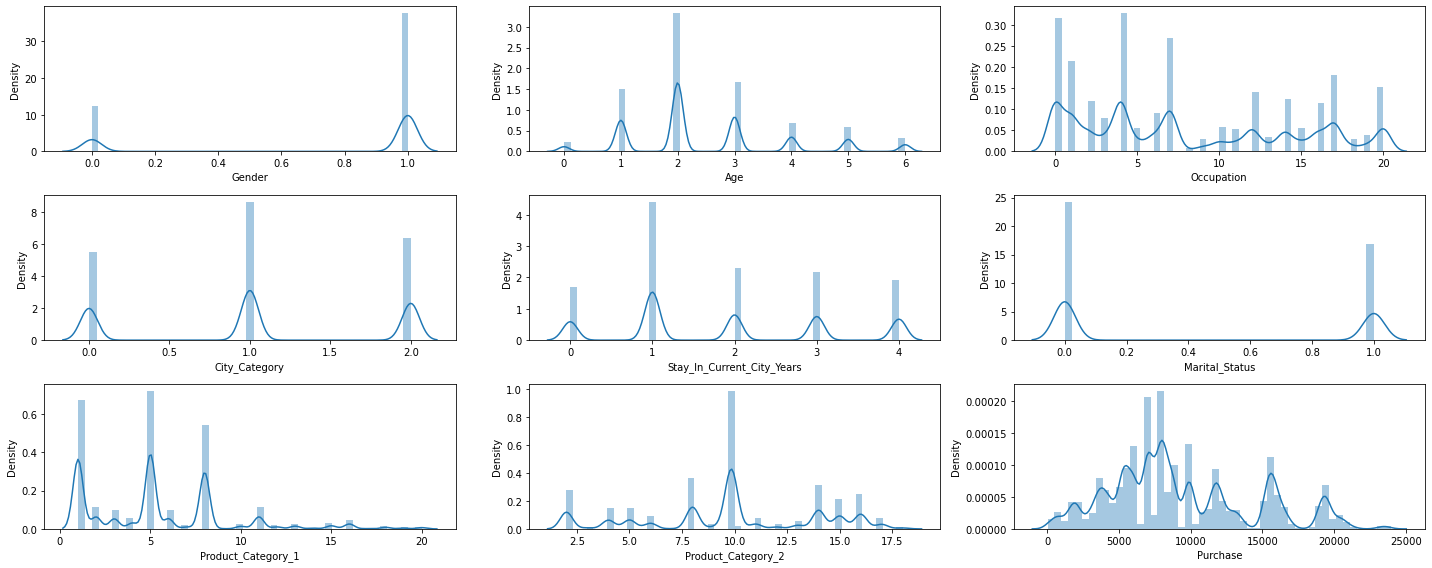

In [33]:
rows=3
cols=3
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,8))
col=df_sales2.columns
index=2
for i in range(rows):
    for j in range(cols):
        sns.distplot(df_sales2[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()
## El gráfico de distribución nos ayuda a detectar la asimetría de los datos. A continuación se puede ver que la columna de compra

### Transformación logarítmica

La transformación logarítmica es, posiblemente, la más popular entre los diferentes tipos de transformaciones utilizadas para transformar datos asimétricos para que se ajusten aproximadamente a la normalidad. Si los datos originales siguen una distribución log-normal o aproximadamente, entonces los datos transformados logarítmicamente siguen una distribución normal o casi normal.

In [35]:
df_sales2['Purchase']=np.log(df_sales2['Purchase'])
## La transformación logaritmica nos ayudará a transformar los datos y cambiarlos a la distribución normal.

In [37]:
df_sales2= pd.get_dummies(df_sales2)
df_sales2.head()
## La función get_dummies() se utiliza para convertir variables categóricas en variables ficticias/indicadoras.

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,0,0,1


### Dividimos nuevamente el data set en datos de prueba y entrenamiento 

In [38]:
X=df_sales2.drop(labels=['Purchase'],axis=1)                         
Y=df_sales2['Purchase']
X.head()
## Los datos se dividen en X e Y donde se han separado las variables independientes y dependientes.

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,0,0,1


#### variable objetivo 

In [39]:
Y

0         9.032409
1         9.629051
2         7.259820
3         6.963190
4         8.983314
            ...   
550063    5.908083
550064    5.916202
550065    4.919981
550066    5.899897
550067    6.194405
Name: Purchase, Length: 550068, dtype: float64

### El 80 por ciento de los datos se utiliza con fines de entrenamiento y el 20 por ciento se utiliza para pruebas.

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
## Los datos se han dividido en Entrenamiento y prueba.

(440054, 12) (110014, 12) (440054,) (110014,)


Escalamos datos

In [41]:
scaled=StandardScaler()
X_train=scaled.fit_transform(X_train)
X_test=scaled.transform(X_test)
## StandardScaler estandariza una característica restando la media y luego escalando a la varianza unitaria.

### **1. Regresión lineal (nuevamente)**

In [42]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [43]:
Y_predict=model.predict(X_test)
## Predecir en X_test

In [47]:
score=r2_score(Y_test,Y_predict)
mae=mean_absolute_error(Y_test,Y_predict)
mse=mean_squared_error(Y_test,Y_predict)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.20164110468414154
mean_absolute_error:  0.4556598754776237
mean_squared_error:  0.4437970304373185
root_mean_squared_error:  0.6661809292056614


Las métricas de evaluación anteriores nos ayudan a determinar qué tan bien se está desempeñando nuestro modelo. Como podemos ver, r2_score es solo 0,20 y como el error cuadrático medio es alto, el modelo no es muy preciso para predecir las compras o la columna objetivo.

### **2. Regresor de árbol de decisión**

In [48]:
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=9)

In [49]:
#prediciendo entrenamiento
train_preds=DT.predict(X_train)
#prediciendo pruebas
test_preds=DT.predict(X_test)

In [53]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared valor en entrenamiento:',DT.score(X_train, Y_train))
print('RSquared valor en test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.36804082144062517
RMSE TestData =  0.36894571291888173
--------------------------------------------------
RSquared valor en entrenamiento: 0.7519510621944243
RSquared valor en test: 0.755128234077739


El regresor del árbol de decisión es mejor en comparación con la regresión lineal, ya que se puede observar que el error cuadrático medio es menor en comparación con el modelo anterior y el valor RSuared es mayor en este modelo.

### **3. Regresor de bosque aleatorio**

computacionalmente costoso!!!

In [54]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [55]:
#prediciendo en entrenamiento
train_preds1=RF.predict(X_train)
#prediciendo en pruebas
test_preds1=RF.predict(X_test)

In [57]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared valor en train:',RF.score(X_train, Y_train))
print('RSquared valor en test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.13140457418614554
RMSE TestData =  0.349824225342448
--------------------------------------------------
RSquared valor en train: 0.9683796731014696
RSquared valor en test: 0.7798526110830482


El modelo de regresor Random Forest es nuevamente mejor que el modelo anterior ya que tenemos un valor de error cuadrático medio más bajo y el valor de Rsquared es mayor que el modelo anterior.

In [59]:
df_sales2

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,20,9.842329,5.908083,0,1,0
550064,1006035,1.953267,0,2,1,3,0,20,9.842329,5.916202,0,0,1
550065,1006036,1.953267,0,2,15,4,1,20,9.842329,4.919981,0,1,0
550066,1006038,1.953267,0,6,1,2,0,20,9.842329,5.899897,0,0,1


In [60]:
test_preds= RF.predict(X)
len(test_preds)

550068

In [61]:
id_frame=pd.read_csv('sales_group_1.csv')

In [62]:
ID_info= id_frame[["User_ID","Product_ID"]]
ID_info.head()
## Usando User_Id y Product_Id del conjunto de prueba.

,User_ID,Product_ID
0,1000001,P00069042
1,1000001,P00248942
2,1000001,P00087842
3,1000001,P00085442
4,1000002,P00285442


In [63]:
predictions= pd.DataFrame(test_preds, columns=["Purchase"])
predictions["User_ID"]= ID_info["User_ID"]
predictions["Product_ID"]= ID_info["Product_ID"]
predictions.sample(10)

,Purchase,User_ID,Product_ID
538087,4.760764,1004821,P00218342
214808,9.595057,1003202,P00147742
106639,4.700212,1004415,P00032942
152074,4.774994,1005509,P00252542
74694,4.555835,1005516,P00218342
427031,4.655921,1005751,P00173242
257977,4.471075,1003762,P00117842
208492,9.592654,1002092,P00278242
139445,9.680297,1003548,P00347642
191975,4.676708,1005659,P00021742


# **Modelo 3**

In [101]:
df_sales3 = pd.read_csv("sales_group_1.csv")

#### Eliminar columnas no deseadas

In [102]:
df_sales3.drop(columns  = ['User_ID','Product_ID'], inplace=True)

In [69]:
validation = df_sales3.sample(frac=0.3,replace=False,random_state = 1)# contiene el 30% de las filas muestreadas aleatoriamente del DataFrame original 

In [70]:
x_train = df_sales3.drop(validation.index, axis = 0)
x_train.reset_index(inplace=True,drop = True)
x_val = validation.reset_index(drop=True)
y_train = x_train['Purchase']
y_val = x_val['Purchase']
x_train.drop(columns = ['Purchase'],inplace=True)
x_val.drop(columns = ['Purchase'],inplace=True)

In [71]:
print(f"Shape of x_train {x_train.shape[0]:,} rows ,{x_train.shape[1]} cols")
print(f"Shape of y_train {y_train.shape[0]:,} rows")
print(f"Shape of x_val {x_val.shape[0]:,} rows,{x_val.shape[1]} cols")
print(f"Shape of y_val {y_val.shape[0]:,} rows")

Shape of x_train 385,048 rows ,9 cols
Shape of y_train 385,048 rows
Shape of x_val 165,020 rows,9 cols
Shape of y_val 165,020 rows


In [73]:
class feature_engineering:
    def __init__(self,training_data = x_train):
        self.prod_cat2_mode = x_train['Product_Category_2'].mode().item()
        self.prod_cat3_mode = x_train['Product_Category_3'].mode().item()
        self.std_scaler = sk_preprocess.StandardScaler()
    
    # ENCODING
    def do_encoding(self,df): 
        '''Codificación de género'''
        df['Gender'] = df['Gender'].map({'F':0,'M':1})

        '''Codificacion de edad'''
        df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

        '''codificando City_Category'''
        city_cats = pd.get_dummies(df['City_Category'],drop_first = True)
        df = pd.concat([df,city_cats],axis=1)
        df.drop(columns = ['City_Category'] , inplace=True)

        '''Manejo de los Stay_In_Current_City_Years '''
        df['Stay_In_Current_City_Years'].unique()
        df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+','4').astype(int)

        return df
    
    # imputacion null
    def fillna_with_mode(self,df): 
        df['Product_Category_2'] = df['Product_Category_2'].fillna(self.prod_cat2_mode)
        df['Product_Category_3'] = df['Product_Category_3'].fillna(self.prod_cat3_mode)
        return df
    
    # escalando caracteristicas
    def scaling(self,df,train):
        cols = df.columns
        if train:
            print('entrenamiento adecuado para escalar')
            self.std_scaler.fit(df)
        df = self.std_scaler.transform(df)
        df = pd.DataFrame(df,columns = cols)
        return df
    
    # funcion principal
    def do_all(self,df,train = False):
        df = self.do_encoding(df = df.copy())
        df = self.fillna_with_mode(df = df.copy())
        df_ = self.scaling(df,train = train)
        if train:
            return df,df_
        return df

In [74]:
feat_eng = feature_engineering(training_data = x_train.copy())

In [75]:
non_scaled_x_train,x_train = feat_eng.do_all(df = x_train.copy(), train = True)
x_val = feat_eng.do_all(df = x_val.copy())

entrenamiento adecuado para escalar


In [76]:
x_train.corr()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
Gender,1.000000,-0.004854,0.118063,0.016667,-0.012404,-0.044707,-0.011690,-0.005247,-0.006140,-0.000683
Age,-0.004854,1.000000,0.092017,-0.005659,0.312244,0.060175,0.040331,0.035623,-0.018640,0.111330
Occupation,0.118063,0.092017,1.000000,0.030439,0.023608,-0.008398,0.002212,-0.001603,-0.010927,0.034972
Stay_In_Current_City_Years,0.016667,-0.005659,0.030439,1.000000,-0.013376,-0.004868,-0.000913,-0.000025,0.010978,0.010901
Marital_Status,-0.012404,0.312244,0.023608,-0.013376,1.000000,0.019219,0.009758,0.013907,-0.001545,0.033075
Product_Category_1,-0.044707,0.060175,-0.008398,-0.004868,0.019219,1.000000,0.279401,0.319406,-0.006547,-0.008723
Product_Category_2,-0.011690,0.040331,0.002212,-0.000913,0.009758,0.279401,1.000000,0.464290,-0.002900,-0.001527
Product_Category_3,-0.005247,0.035623,-0.001603,-0.000025,0.013907,0.319406,0.464290,1.000000,0.003879,-0.021529
B,-0.006140,-0.018640,-0.010927,0.010978,-0.001545,-0.006547,-0.002900,0.003879,1.000000,-0.572154
C,-0.000683,0.111330,0.034972,0.010901,0.033075,-0.008723,-0.001527,-0.021529,-0.572154,1.000000


El modelado de clases proporcionará resultados de todos los algoritmos de regresión [excluyendo el ajuste de hiperparámetros] junto con métricas de evaluación [r2score y mean_squared_error]

**Nota:** Las predicciones se realizan con hiperparámetros predeterminados.

In [81]:
class modelling:
    def __init__(self):      
        self.all_regression_models = {'linear_reg':LinearRegression(),'ridge_reg':Ridge(),'decision_tree':DecisionTreeRegressor(),'random_forest':RandomForestRegressor(),'knn':KNeighborsRegressor(),
                        'adaboost':AdaBoostRegressor(),'gbm':GradientBoostingRegressor(),'xgbm':XGBRegressor(),'lightgbm':LGBMRegressor()}
        self.all_predictions = dict()
        

    def model_fit(self,x_train,y_train):
        for model,model_obj in self.all_regression_models.items():
            model_obj.fit(x_train,y_train)
            print(f'{model} entrenamiento completo')
            
    def model_predict(self, x_test):
        for model,model_obj in self.all_regression_models.items():
            train_pred = model_obj.predict(x_test)
            self.all_predictions[model] = train_pred
            print(f'{model} prediccion completa')
            
    def eval_metric(self,y_actuals):
        from sklearn.metrics import mean_squared_error,r2_score
        combined_metrics = []
        for model,model_preds in self.all_predictions.items():
            r2score = r2_score(y_actuals,model_preds)
            mse = mean_squared_error(y_actuals,model_preds)
            combined_metrics.append([model,r2score,mse])
            print(f"Model {model}")
            print(f'Regular R2 score en datos de entrenamiento es : {r2score:%}')
            print(f'Regular mean_squared_error en datos de entrenamiento es : {mse:,}')
            print("*********************************************************")
        df = pd.DataFrame(combined_metrics, columns = ['MODEL','R2_SCORE','MSE']).sort_values('R2_SCORE',ascending = False,ignore_index = True)
        df['MSE'] = df['MSE'].round()
        df['R2_SCORE'] = df['R2_SCORE'].round(3)
        df_styled = df.style.format({'R2_SCORE':"{:%}","MSE":"{:,}"}).background_gradient()
        return df,df_styled

#### CREAR PREDICCIONES SOBRE LOS DATOS DE ENTRENAMIENTO A ESCALA DESPUÉS DE UTILIZAR LOS MISMOS 

In [103]:


mod_first_cut = modelling()
print("------------------------")
mod_first_cut.model_fit(x_train = x_train.copy(), y_train = y_train.copy())
print("------------------------")
mod_first_cut.model_predict(x_test = x_train.copy())
print("------------------------")
scaled_train_scores,scaled_train_scores_styled=mod_first_cut.eval_metric(y_actuals = y_train.copy())

------------------------
linear_reg entrenamiento completo
ridge_reg entrenamiento completo
decision_tree entrenamiento completo
random_forest entrenamiento completo
knn entrenamiento completo
adaboost entrenamiento completo
gbm entrenamiento completo
xgbm entrenamiento completo
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 385048, number of used features: 10
[LightGBM] [Info] Start training from score 9265.705873
lightgbm entrenamiento completo
------------------------
linear_reg prediccion completa
ridge_reg prediccion completa
decision_tree prediccion completa
random_forest prediccion completa
knn prediccion completa
adaboost prediccion completa
gbm prediccion completa
xgbm prediccion completa
lightgbm prediccion com

#### CREAR PREDICCIONES SOBRE LOS DATOS DE ENTRENAMIENTO NO ESCALADOS DESPUÉS DE AJUSTAR LOS MISMOS 

In [104]:
mod_non_scaled = modelling()
print("------------------------")
mod_non_scaled.model_fit(x_train = non_scaled_x_train.copy(), y_train = y_train.copy())
print("------------------------")
mod_non_scaled.model_predict(x_test = non_scaled_x_train.copy())
print("------------------------")
non_scaled_train_scores,non_scaled_train_scores_styled=mod_non_scaled.eval_metric(y_actuals = y_train.copy())

------------------------
linear_reg entrenamiento completo
ridge_reg entrenamiento completo
decision_tree entrenamiento completo
random_forest entrenamiento completo
knn entrenamiento completo
adaboost entrenamiento completo
gbm entrenamiento completo
xgbm entrenamiento completo
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 385048, number of used features: 10
[LightGBM] [Info] Start training from score 9265.705873
lightgbm entrenamiento completo
------------------------
linear_reg prediccion completa
ridge_reg prediccion completa
decision_tree prediccion completa
random_forest prediccion completa
knn prediccion completa
adaboost prediccion completa
gbm prediccion completa
xgbm prediccion completa
lightgbm prediccion comp

#### CREACIÓN DE UNA MATRIZ DE COMPARACIÓN DE RESULTADOS ESCALADOS Y NO ESCALADOS

In [105]:
scaled_non_scaled_metric = scaled_train_scores.merge(non_scaled_train_scores,how='left',on='MODEL',suffixes=('_scaled','_non_scaled'))
scaled_non_scaled_metric['MSE_scaled'] = scaled_non_scaled_metric['MSE_scaled'].round()
scaled_non_scaled_metric['MSE_non_scaled'] = scaled_non_scaled_metric['MSE_non_scaled'].round()
scaled_non_scaled_metric['R2_SCORE_scaled'] = scaled_non_scaled_metric['R2_SCORE_scaled'].round(3)
scaled_non_scaled_metric['R2_SCORE_non_scaled'] = scaled_non_scaled_metric['R2_SCORE_non_scaled'].round(3)
scaling_comparo=scaled_non_scaled_metric.style.format({'R2_SCORE_scaled':"{:%}","MSE_scaled":"{:,}",'R2_SCORE_non_scaled':"{:%}","MSE_non_scaled":"{:,}"}).background_gradient()

#### MATRIZ DE COMPARACIÓN ESCALADA Vs sin escalar

In [106]:
scaling_comparo

,MODEL,R2_SCORE_scaled,MSE_scaled,R2_SCORE_non_scaled,MSE_non_scaled
0,decision_tree,79.600000%,"5,152,666.0",79.600000%,"5,152,666.0"
1,random_forest,78.500000%,"5,422,137.0",78.500000%,"5,421,505.0"
2,xgbm,67.800000%,"8,114,481.0",67.800000%,"8,114,481.0"
3,lightgbm,66.400000%,"8,470,255.0",66.400000%,"8,470,255.0"
4,knn,64.900000%,"8,862,278.0",68.900000%,"7,831,864.0"
5,gbm,64.700000%,"8,896,835.0",64.700000%,"8,896,835.0"
6,adaboost,40.700000%,"14,950,999.0",40.500000%,"15,000,161.0"
7,linear_reg,13.100000%,"21,902,701.0",13.100000%,"21,902,701.0"
8,ridge_reg,13.100000%,"21,902,701.0",13.100000%,"21,902,701.0"


#### CREAR PREDICCIONES SOBRE LOS DATOS DE VALIDACIÓN DESPUÉS DE AJUSTAR LOS DATOS DE ENTRENAMIENTO A ESCALA 

In [107]:
mod_val = modelling()
print("------------------------")
mod_val.model_fit(x_train = x_train.copy(), y_train = y_train.copy())
print("------------------------")
mod_val.model_predict(x_test = x_val.copy())
print("------------------------")
val_scores,val_scores_styled=mod_val.eval_metric(y_actuals = y_val.copy())

------------------------
linear_reg entrenamiento completo
ridge_reg entrenamiento completo
decision_tree entrenamiento completo
random_forest entrenamiento completo
knn entrenamiento completo
adaboost entrenamiento completo
gbm entrenamiento completo
xgbm entrenamiento completo
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 385048, number of used features: 10
[LightGBM] [Info] Start training from score 9265.705873
lightgbm entrenamiento completo
------------------------
linear_reg prediccion completa
ridge_reg prediccion completa
decision_tree prediccion completa
random_forest prediccion completa
knn prediccion completa
adaboost prediccion completa
gbm prediccion completa
xgbm prediccion completa
lightgbm prediccion com

In [92]:
val_scores_styled

,MODEL,R2_SCORE,MSE
0,adaboost,18.800000%,"20,530,104.0"
1,xgbm,-54.200000%,"38,980,227.0"
2,gbm,-105.300000%,"51,895,006.0"
3,lightgbm,-112.000000%,"53,570,058.0"
4,random_forest,-139.900000%,"60,628,877.0"
5,decision_tree,-167.700000%,"67,650,292.0"
6,knn,-201.800000%,"76,279,975.0"
7,ridge_reg,-845.300000%,"238,899,983.0"
8,linear_reg,-845.300000%,"238,900,519.0"


#### Esta función ayuda a crear gráficos de ajuste versus reales [PRIMEROS 100 PUNTOS DE DATOS] para predicciones de todos los modelos diferentes 

In [108]:

def plot_fit_acts(modelling_obj,actuals):
    name_ = actuals.name
    temp = pd.DataFrame(actuals)
    rows= math.floor(len(modelling_obj.all_predictions.keys())/2)
    fig,axis = plt.subplots(rows,2,figsize = (20,25))
    axis_combos = [(r,c) for r in range(rows) for c in range(2)]
    for model,predictions,ax in zip(modelling_obj.all_predictions.keys(),modelling_obj.all_predictions.values(),axis_combos):
        temp[name_+' predictions'] = predictions
        temp.iloc[:100,:].plot(title = f"{model} Fit Vs Actuals", ax= axis[ax[0],ax[1]])

#### Ajustar versus datos reales de modelos escalados con la columna Objetivo-Purchase

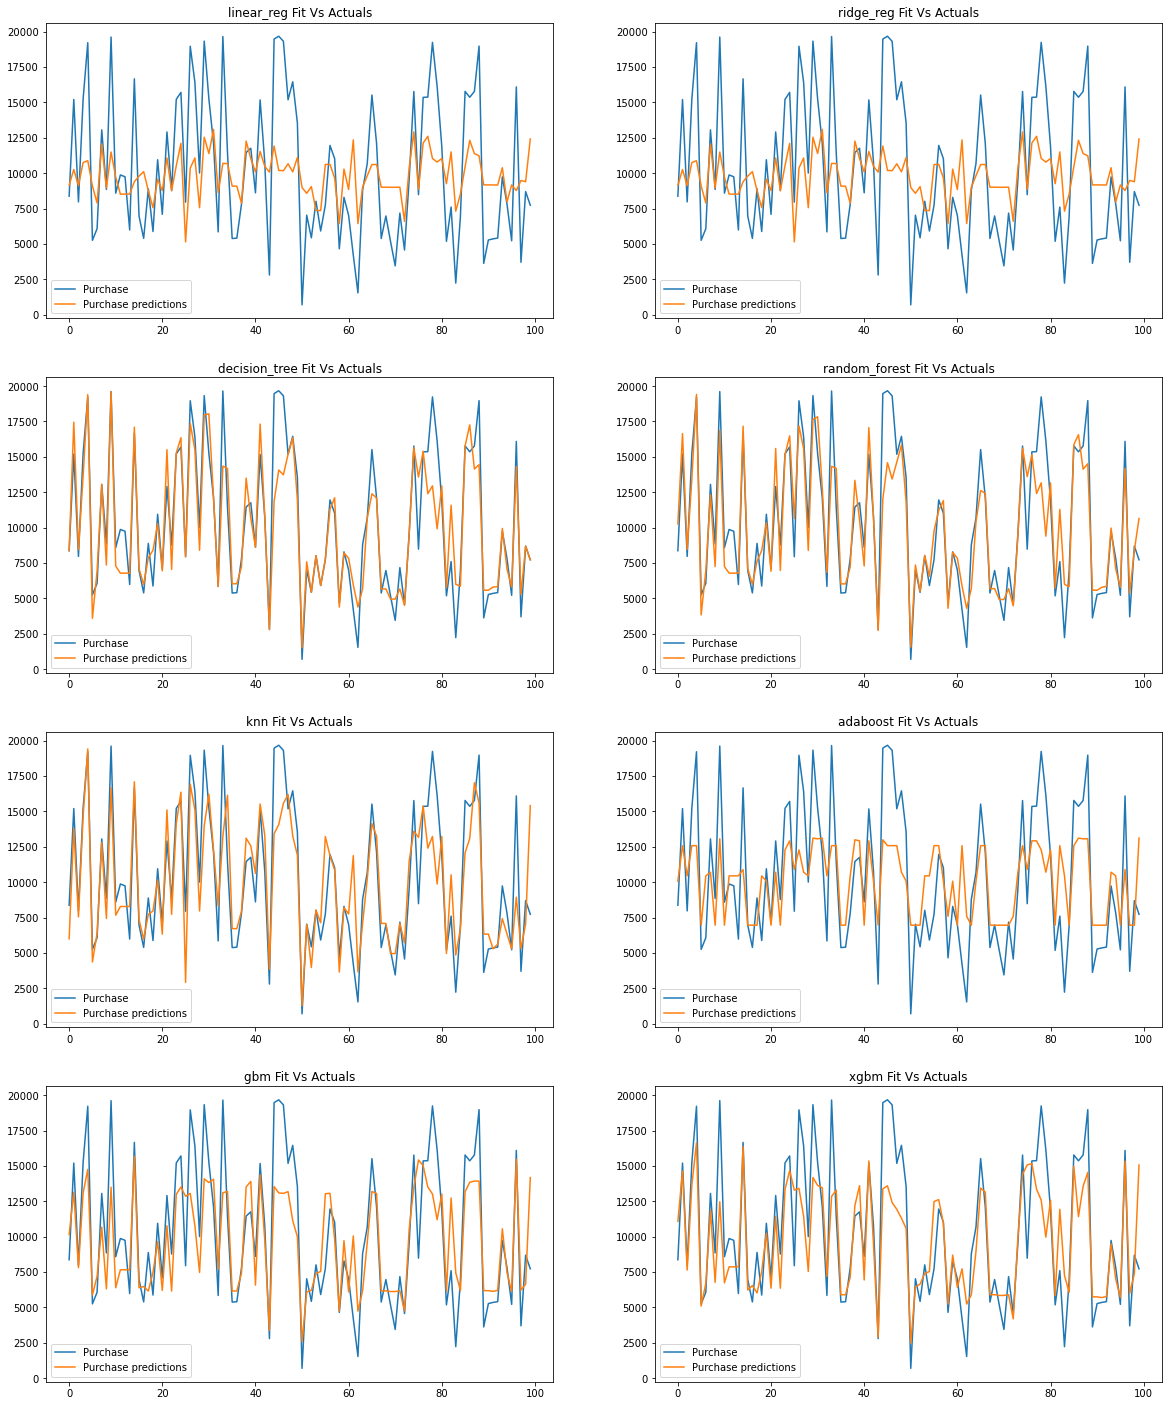

In [109]:
plot_fit_acts(mod_first_cut,actuals = y_train.copy())

#### Ajuste versus datos reales de datos de validación con columna de destino-purchase

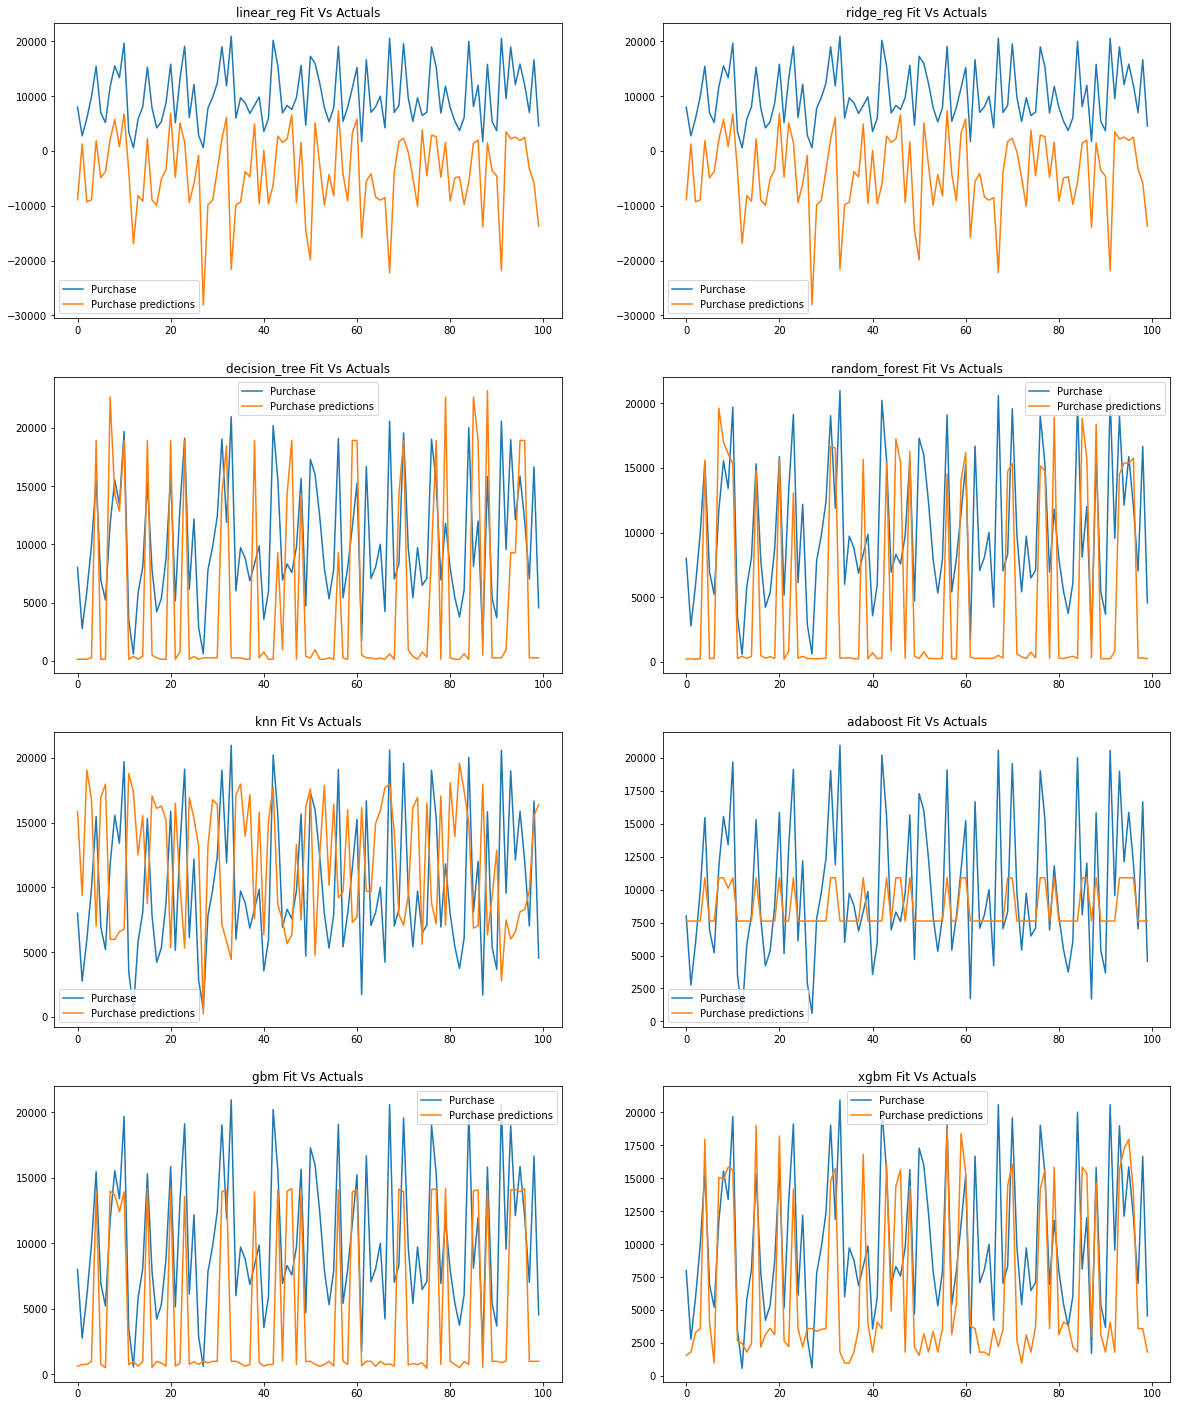

In [110]:
plot_fit_acts(mod_val,actuals = y_val.copy())


#### **Observaciónes:**

1. Inferir el ajuste frente a los valores reales es necesario realizar más ajustes de hiperparámetros para reducir la alta variación en la salida

2. Tener más extracción de características podría ayudar a realizar mejores predicciones.



### **Conclusiones**

Hicimos diferentes tipos de análisis de los datos, visualizamos los datos con diferentes tipos de gráficos y entrenamos el modelo con diferentes tipos de modelos de aprendizaje automático para predecir el monto de compra que el usuario podría gastar en una proxima compra.  

Entonces, ahora la pregunta es ¿qué pueden obtener los minoristas de todo esto? Los minoristas ahora tienen informes de análisis y un modelo capacitado, con el que pueden crear diferentes grupos de clientes y ofrecer diferentes tipos de ofertas. Se deben aplicar diferentes tipos de estrategias de marketing para todos y cada uno de los grupos después de que puedan tener un desempeño sobresaliente en la "competencia" del viernes negro. 